In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

<h2><b>S&P 500 Data Extraction</b></h2>


In [28]:
sp500 = pd.read_csv("^spx_m.csv")
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500['Date'] = pd.to_datetime(sp500['Date']).dt.to_period('M').astype(str)
sp500.rename(columns={'Volume': 'VOLUME'}, inplace=True)
sp500['Return'] = sp500['Close'].pct_change()
sp500['VOLUME%'] = sp500['VOLUME'].pct_change()
sp500.dropna(subset=['Return','VOLUME%'], inplace=True)


<h2><b>Macroeconomic Factors</b></h2>

In [3]:
fed_funds = pd.read_csv("FEDFUNDS.csv")
fed_funds['observation_date'] = pd.to_datetime(fed_funds['observation_date'])
fed_funds['observation_date'] = pd.to_datetime(fed_funds['observation_date']).dt.to_period('M').astype(str)
fed_funds.rename(columns={'observation_date': 'Date'}, inplace=True)
fed_funds['FEDFUNDS%'] = fed_funds['FEDFUNDS'].pct_change()
fed_funds.dropna(subset=['FEDFUNDS%'], inplace=True)
fed_funds

Date  FEDFUNDS  FEDFUNDS%
1    1960-07      3.23  -0.027108
2    1960-08      2.98  -0.077399
3    1960-09      2.60  -0.127517
4    1960-10      2.47  -0.050000
5    1960-11      2.44  -0.012146
..       ...       ...        ...
778  2025-04      4.33   0.000000
779  2025-05      4.33   0.000000
780  2025-06      4.33   0.000000
781  2025-07      4.33   0.000000
782  2025-08      4.33   0.000000

[782 rows x 3 columns]

In [4]:
cpi = pd.read_csv("CPIAUCSL.csv")
cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])
cpi['observation_date'] = pd.to_datetime(cpi['observation_date']).dt.to_period('M').astype(str)
cpi.rename(columns={'observation_date': 'Date','CPIAUCSL': 'CPI'}, inplace=True)
cpi['CPI%'] = cpi['CPI'].pct_change()
cpi.dropna(subset=['CPI%'], inplace=True)
cpi

Date      CPI      CPI%
1    1960-07   29.550 -0.002026
2    1960-08   29.610  0.002030
3    1960-09   29.610  0.000000
4    1960-10   29.750  0.004728
5    1960-11   29.780  0.001008
..       ...      ...       ...
778  2025-04  320.321  0.002209
779  2025-05  320.580  0.000809
780  2025-06  321.500  0.002870
781  2025-07  322.132  0.001966
782  2025-08  323.364  0.003825

[782 rows x 3 columns]

In [5]:
unemp = pd.read_csv("UNRATE.csv")
unemp['observation_date'] = pd.to_datetime(unemp['observation_date'])
unemp['observation_date'] = pd.to_datetime(unemp['observation_date']).dt.to_period('M').astype(str)
unemp.rename(columns={'observation_date': 'Date'}, inplace=True)
unemp['UNRATE%'] = unemp['UNRATE'].pct_change()
unemp.dropna(subset=['UNRATE%'], inplace=True)
unemp

Date  UNRATE   UNRATE%
1    1960-07     5.5  0.018519
2    1960-08     5.6  0.018182
3    1960-09     5.5 -0.017857
4    1960-10     6.1  0.109091
5    1960-11     6.1  0.000000
..       ...     ...       ...
778  2025-04     4.2  0.000000
779  2025-05     4.2  0.000000
780  2025-06     4.1 -0.023810
781  2025-07     4.2  0.024390
782  2025-08     4.3  0.023810

[782 rows x 3 columns]

In [6]:
bond_yield = pd.read_csv("IRLTLT01USM156N.csv")
bond_yield['observation_date'] = pd.to_datetime(bond_yield['observation_date'])
bond_yield['observation_date'] = pd.to_datetime(bond_yield['observation_date']).dt.to_period('M').astype(str)
bond_yield.rename(columns={'observation_date': 'Date','IRLTLT01USM156N': 'BIT'}, inplace=True) # BIT is Bond Interest Rate
bond_yield['BIT%'] = bond_yield['BIT'].pct_change()
bond_yield.dropna(subset=['BIT%'], inplace=True)
bond_yield

Date   BIT      BIT%
1    1960-07  3.90 -0.060241
2    1960-08  3.80 -0.025641
3    1960-09  3.80  0.000000
4    1960-10  3.89  0.023684
5    1960-11  3.93  0.010283
..       ...   ...       ...
778  2025-04  4.28  0.000000
779  2025-05  4.42  0.032710
780  2025-06  4.38 -0.009050
781  2025-07  4.39  0.002283
782  2025-08  4.26 -0.029613

[782 rows x 3 columns]

In [7]:
commodity = pd.read_csv("PPIACO.csv")
commodity['observation_date'] = pd.to_datetime(commodity['observation_date'])
commodity['observation_date'] = pd.to_datetime(commodity['observation_date']).dt.to_period('M').astype(str)
commodity.rename(columns={'observation_date': 'Date','PPIACO': 'COM_PRICE'}, inplace=True) # com_price = commodity price 
commodity['COM_PRICE%'] = commodity['COM_PRICE'].pct_change()
commodity.dropna(subset=['COM_PRICE%'], inplace=True)
commodity

Date  COM_PRICE  COM_PRICE%
1    1960-07     31.700    0.000000
2    1960-08     31.600   -0.003155
3    1960-09     31.600    0.000000
4    1960-10     31.700    0.003165
5    1960-11     31.700    0.000000
..       ...        ...         ...
778  2025-04    258.392   -0.000514
779  2025-05    258.642    0.000968
780  2025-06    260.690    0.007918
781  2025-07    262.562    0.007181
782  2025-08    262.443   -0.000453

[782 rows x 3 columns]

<h2><b>Technical Factors</b></h2>


In [8]:
sp500['Spread'] = sp500['High']-sp500['Close']
sp500

Date     Open     High      Low    Close        VOLUME    Return  \
1    1960-07    57.06    57.38    54.17    55.51  2.992222e+07 -0.024772   
2    1960-08    55.53    58.07    54.72    56.96  3.629445e+07  0.026121   
3    1960-09    57.09    57.09    52.48    53.52  3.380000e+07 -0.060393   
4    1960-10    53.36    54.86    52.20    53.39  3.020556e+07 -0.002429   
5    1960-11    53.94    56.43    53.94    55.54  3.445000e+07  0.040270   
..       ...      ...      ...      ...      ...           ...       ...   
779  2025-05  5625.14  5968.61  5578.64  5911.69  6.258743e+10  0.061524   
780  2025-06  5896.68  6215.08  5861.43  6204.95  6.304252e+10  0.049607   
781  2025-07  6187.25  6417.83  6177.97  6339.39  6.462206e+10  0.021667   
782  2025-08  6287.28  6508.23  6212.69  6460.26  6.096895e+10  0.019067   
783  2025-09  6401.51  6618.71  6360.58  6615.28  2.888444e+10  0.023996   

     Spread  
1      1.87  
2      1.11  
3      3.57  
4      1.47  
5      0.89  
..      ...  
779   56.92  
780   10.13  
781   78.44  
782   47.97  
783    3.43  

[783 rows x 8 columns]

In [9]:
def calculate_ATR(df, n=14):
    # True Range components
    df['H-L'] = df['High'] - df['Low']
    df['H-PC'] = abs(df['High'] - df['Close'].shift(1))
    df['L-PC'] = abs(df['Low'] - df['Close'].shift(1))
    
    # True Range
    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)
    
    # Average True Range (EMA of TR)
    df['ATR_norm'] = (df['TR'].ewm(span=n, adjust=False).mean())/df['Close']
    return df

def calculate_RSI(df, n=14):
    delta = df['Close'].diff()

    # Gains (positive) and losses (negative turned positive)
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)

    # Rolling average of gains and losses
    avg_gain = gain.rolling(window=n, min_periods=1).mean()
    avg_loss = loss.rolling(window=n, min_periods=1).mean()
    epsilon = 1e-10
    RS = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + RS))

    return df

def calculate_MACD(df, short=12, long=26, signal=9):
    """
    Adds MACD, Signal Line, and Histogram to dataframe.
    df must have a 'Close' column.
    """
    # Short-term EMA (usually 12)
    df['EMA_short'] = df['Close'].ewm(span=short, adjust=False).mean()
    
    # Long-term EMA (usually 26)
    df['EMA_long'] = df['Close'].ewm(span=long, adjust=False).mean()
    
    # MACD Line
    df['MACD'] = df['EMA_short'] - df['EMA_long']
    
    # Signal Line
    df['Signal'] = df['MACD'].ewm(span=signal, adjust=False).mean()
    
    # Histogram
    df['MACD_Hist'] = df['MACD'] - df['Signal']
    
    return df


# Example usage (assuming df has columns: Date, Open, High, Low, Close, Volume)
sp500 = calculate_ATR(sp500, n=14)
sp500 = calculate_RSI(sp500, n=14)
sp500 = calculate_MACD(sp500)

In [10]:
sp500

Date     Open     High      Low    Close        VOLUME    Return  \
1    1960-07    57.06    57.38    54.17    55.51  2.992222e+07 -0.024772   
2    1960-08    55.53    58.07    54.72    56.96  3.629445e+07  0.026121   
3    1960-09    57.09    57.09    52.48    53.52  3.380000e+07 -0.060393   
4    1960-10    53.36    54.86    52.20    53.39  3.020556e+07 -0.002429   
5    1960-11    53.94    56.43    53.94    55.54  3.445000e+07  0.040270   
..       ...      ...      ...      ...      ...           ...       ...   
779  2025-05  5625.14  5968.61  5578.64  5911.69  6.258743e+10  0.061524   
780  2025-06  5896.68  6215.08  5861.43  6204.95  6.304252e+10  0.049607   
781  2025-07  6187.25  6417.83  6177.97  6339.39  6.462206e+10  0.021667   
782  2025-08  6287.28  6508.23  6212.69  6460.26  6.096895e+10  0.019067   
783  2025-09  6401.51  6618.71  6360.58  6615.28  2.888444e+10  0.023996   

     Spread     H-L    H-PC    L-PC      TR  ATR_norm         RSI  \
1      1.87    3.21     NaN     NaN    3.21  0.057827         NaN   
2      1.11    3.35    2.56    0.79    3.35  0.056683  100.000000   
3      3.57    4.61    0.13    4.48    4.61  0.063768   29.652352   
4      1.47    2.66    1.34    1.32    2.66  0.062043   28.884462   
5      0.89    2.49    3.04    0.55    3.04  0.058987   50.209205   
..      ...     ...     ...     ...     ...       ...         ...   
779   56.92  389.97  399.55    9.58  399.55  0.068791   63.397822   
780   10.13  353.65  303.39   50.26  353.65  0.064400   73.128382   
781   78.44  239.86  212.88   26.98  239.86  0.059675   71.936225   
782   47.97  295.54  168.84  126.70  295.54  0.056850   71.197228   
783    3.43  258.13  158.45   99.68  258.13  0.053318   72.292248   

       EMA_short     EMA_long        MACD      Signal  MACD_Hist  
1      55.510000    55.510000    0.000000    0.000000   0.000000  
2      55.733077    55.617407    0.115670    0.023134   0.092536  
3      55.392604    55.462044   -0.069440    0.004619  -0.074059  
4      55.084511    55.308559   -0.224048   -0.041114  -0.182934  
5      55.154586    55.325703   -0.171117   -0.067115  -0.104002  
..           ...          ...         ...         ...        ...  
779  5655.775633  5268.495301  387.280332  403.325617 -16.045285  
780  5740.263997  5337.862315  402.401682  403.140830  -0.739149  
781  5832.437228  5412.049551  420.387677  406.590199  13.797477  
782  5929.025347  5489.694770  439.330577  413.138275  26.192302  
783  6034.602986  5573.071453  461.531532  422.816926  38.714606  

[783 rows x 19 columns]

In [11]:
df = pd.merge(sp500, fed_funds, how='inner', on='Date')
df = pd.merge(df, cpi, how='inner', on='Date')
df = pd.merge(df, unemp, how='inner', on='Date')
df = pd.merge(df, bond_yield, how='inner', on='Date')
df = pd.merge(df, commodity, how='inner', on='Date')
df

Date     Open     High      Low    Close        VOLUME    Return  \
0    1960-07    57.06    57.38    54.17    55.51  2.992222e+07 -0.024772   
1    1960-08    55.53    58.07    54.72    56.96  3.629445e+07  0.026121   
2    1960-09    57.09    57.09    52.48    53.52  3.380000e+07 -0.060393   
3    1960-10    53.36    54.86    52.20    53.39  3.020556e+07 -0.002429   
4    1960-11    53.94    56.43    53.94    55.54  3.445000e+07  0.040270   
..       ...      ...      ...      ...      ...           ...       ...   
777  2025-04  5597.53  5695.31  4835.04  5569.06  7.972742e+10 -0.007625   
778  2025-05  5625.14  5968.61  5578.64  5911.69  6.258743e+10  0.061524   
779  2025-06  5896.68  6215.08  5861.43  6204.95  6.304252e+10  0.049607   
780  2025-07  6187.25  6417.83  6177.97  6339.39  6.462206e+10  0.021667   
781  2025-08  6287.28  6508.23  6212.69  6460.26  6.096895e+10  0.019067   

     Spread     H-L    H-PC  ...  FEDFUNDS  FEDFUNDS%      CPI      CPI%  \
0      1.87    3.21     NaN  ...      3.23  -0.027108   29.550 -0.002026   
1      1.11    3.35    2.56  ...      2.98  -0.077399   29.610  0.002030   
2      3.57    4.61    0.13  ...      2.60  -0.127517   29.610  0.000000   
3      1.47    2.66    1.34  ...      2.47  -0.050000   29.750  0.004728   
4      0.89    2.49    3.04  ...      2.44  -0.012146   29.780  0.001008   
..      ...     ...     ...  ...       ...        ...      ...       ...   
777  126.25  860.27   83.46  ...      4.33   0.000000  320.321  0.002209   
778   56.92  389.97  399.55  ...      4.33   0.000000  320.580  0.000809   
779   10.13  353.65  303.39  ...      4.33   0.000000  321.500  0.002870   
780   78.44  239.86  212.88  ...      4.33   0.000000  322.132  0.001966   
781   47.97  295.54  168.84  ...      4.33   0.000000  323.364  0.003825   

     UNRATE   UNRATE%   BIT      BIT%  COM_PRICE  COM_PRICE%  
0       5.5  0.018519  3.90 -0.060241     31.700    0.000000  
1       5.6  0.018182  3.80 -0.025641     31.600   -0.003155  
2       5.5 -0.017857  3.80  0.000000     31.600    0.000000  
3       6.1  0.109091  3.89  0.023684     31.700    0.003165  
4       6.1  0.000000  3.93  0.010283     31.700    0.000000  
..      ...       ...   ...       ...        ...         ...  
777     4.2  0.000000  4.28  0.000000    258.392   -0.000514  
778     4.2  0.000000  4.42  0.032710    258.642    0.000968  
779     4.1 -0.023810  4.38 -0.009050    260.690    0.007918  
780     4.2  0.024390  4.39  0.002283    262.562    0.007181  
781     4.3  0.023810  4.26 -0.029613    262.443   -0.000453  

[782 rows x 29 columns]

In [12]:
plt.scatter(df['FEDFUNDS'],df['Return'])

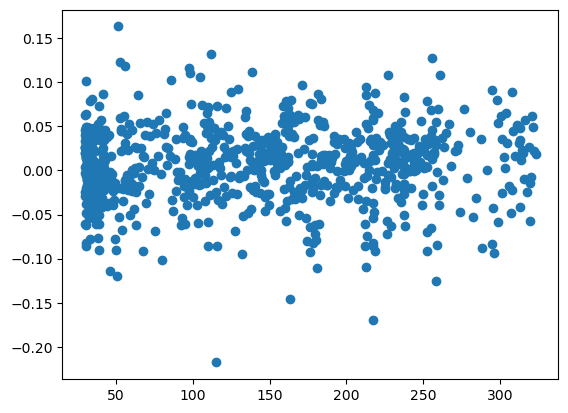

In [13]:
plt.scatter(df['CPI'],df['Return'])

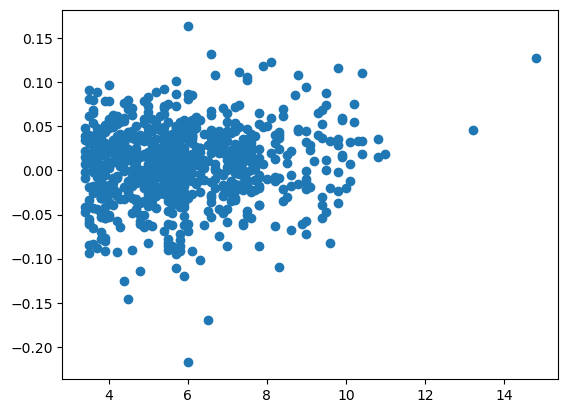

In [15]:
plt.scatter(df['UNRATE'],df['Return'])

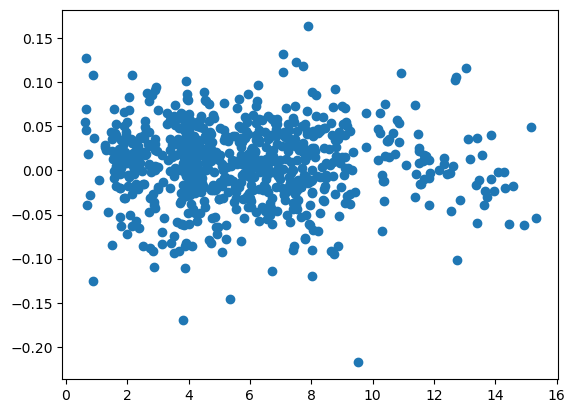

In [16]:
plt.scatter(df['BIT'],df['Return'])

In [17]:
plt.scatter(df['COM_PRICE'],df['Return'])

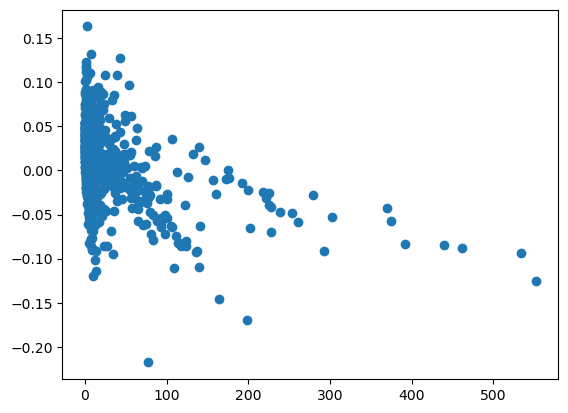

In [18]:
plt.scatter(df['Spread'],df['Return'])

In [20]:
plt.scatter(df['ATR_norm'],df['Return'])

In [21]:
plt.scatter(df['RSI'],df['Return'])

In [24]:
corr = df[["FEDFUNDS%", "CPI%", "UNRATE%",'BIT%','COM_PRICE%','VOLUME','Spread','ATR_norm','RSI','MACD',"Return"]].corr()
corr

FEDFUNDS%      CPI%   UNRATE%      BIT%  COM_PRICE%    VOLUME  \
FEDFUNDS%    1.000000  0.186060 -0.299755  0.214505    0.214941  0.049451   
CPI%         0.186060  1.000000 -0.110566  0.244223    0.639187 -0.253574   
UNRATE%     -0.299755 -0.110566  1.000000 -0.204675   -0.184580  0.071146   
BIT%         0.214505  0.244223 -0.204675  1.000000    0.317689 -0.009663   
COM_PRICE%   0.214941  0.639187 -0.184580  0.317689    1.000000 -0.071446   
VOLUME       0.049451 -0.253574  0.071146 -0.009663   -0.071446  1.000000   
Spread       0.092329 -0.100417  0.027878  0.044465   -0.048503  0.509704   
ATR_norm    -0.118615  0.072689  0.163185 -0.055938   -0.047474  0.178067   
RSI          0.094210 -0.125474 -0.118636  0.042099    0.017569 -0.004595   
MACD         0.159874 -0.021006 -0.044273  0.091778    0.073133  0.507167   
Return      -0.060457 -0.086931  0.068400 -0.051056   -0.035090 -0.016443   

              Spread  ATR_norm       RSI      MACD    Return  
FEDFUNDS%   0.092329 -0.118615  0.094210  0.159874 -0.060457  
CPI%       -0.100417  0.072689 -0.125474 -0.021006 -0.086931  
UNRATE%     0.027878  0.163185 -0.118636 -0.044273  0.068400  
BIT%        0.044465 -0.055938  0.042099  0.091778 -0.051056  
COM_PRICE% -0.048503 -0.047474  0.017569  0.073133 -0.035090  
VOLUME      0.509704  0.178067 -0.004595  0.507167 -0.016443  
Spread      1.000000  0.241453 -0.109167  0.419347 -0.422959  
ATR_norm    0.241453  1.000000 -0.705564 -0.253518 -0.142076  
RSI        -0.109167 -0.705564  1.000000  0.369470  0.251649  
MACD        0.419347 -0.253518  0.369470  1.000000  0.041817  
Return     -0.422959 -0.142076  0.251649  0.041817  1.000000

In [26]:
df = df[['Date','BIT%','CPI%','UNRATE%','COM_PRICE%','VOLUME','Spread','ATR_norm','RSI','MACD','Open','Close','High','Low','Return']]
df

Date      BIT%      CPI%   UNRATE%  COM_PRICE%        VOLUME  Spread  \
0    1960-07 -0.060241 -0.002026  0.018519    0.000000  2.992222e+07    1.87   
1    1960-08 -0.025641  0.002030  0.018182   -0.003155  3.629445e+07    1.11   
2    1960-09  0.000000  0.000000 -0.017857    0.000000  3.380000e+07    3.57   
3    1960-10  0.023684  0.004728  0.109091    0.003165  3.020556e+07    1.47   
4    1960-11  0.010283  0.001008  0.000000    0.000000  3.445000e+07    0.89   
..       ...       ...       ...       ...         ...           ...     ...   
777  2025-04  0.000000  0.002209  0.000000   -0.000514  7.972742e+10  126.25   
778  2025-05  0.032710  0.000809  0.000000    0.000968  6.258743e+10   56.92   
779  2025-06 -0.009050  0.002870 -0.023810    0.007918  6.304252e+10   10.13   
780  2025-07  0.002283  0.001966  0.024390    0.007181  6.462206e+10   78.44   
781  2025-08 -0.029613  0.003825  0.023810   -0.000453  6.096895e+10   47.97   

     ATR_norm         RSI        MACD     Open    Close     High      Low  \
0    0.057827         NaN    0.000000    57.06    55.51    57.38    54.17   
1    0.056683  100.000000    0.115670    55.53    56.96    58.07    54.72   
2    0.063768   29.652352   -0.069440    57.09    53.52    57.09    52.48   
3    0.062043   28.884462   -0.224048    53.36    53.39    54.86    52.20   
4    0.058987   50.209205   -0.171117    53.94    55.54    56.43    53.94   
..        ...         ...         ...      ...      ...      ...      ...   
777  0.073220   60.420257  392.206023  5597.53  5569.06  5695.31  4835.04   
778  0.068791   63.397822  387.280332  5625.14  5911.69  5968.61  5578.64   
779  0.064400   73.128382  402.401682  5896.68  6204.95  6215.08  5861.43   
780  0.059675   71.936225  420.387677  6187.25  6339.39  6417.83  6177.97   
781  0.056850   71.197228  439.330577  6287.28  6460.26  6508.23  6212.69   

       Return  
0   -0.024772  
1    0.026121  
2   -0.060393  
3   -0.002429  
4    0.040270  
..        ...  
777 -0.007625  
778  0.061524  
779  0.049607  
780  0.021667  
781  0.019067  

[782 rows x 15 columns]

In [27]:
# Define features (regressors) and target
X = df[["BIT%", "CPI%", "UNRATE%", "COM_PRICE%",'Spread','ATR_norm','MACD']]
y = df["Return"]

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Coefficients: [ 1.09161883e-02 -2.46979747e+00  3.75901582e-02  1.21388643e-01
 -4.06574059e-04  1.21249188e-01  1.43126227e-04]
Intercept: 0.01097563340976829
Mean Squared Error: 0.0015837319798165867
R-squared: 0.23574738116079363
